## 4장 선형 회귀모형

## [1] 표준 선형 회귀모형

- 종속변수 분포 확인 및 로그변환

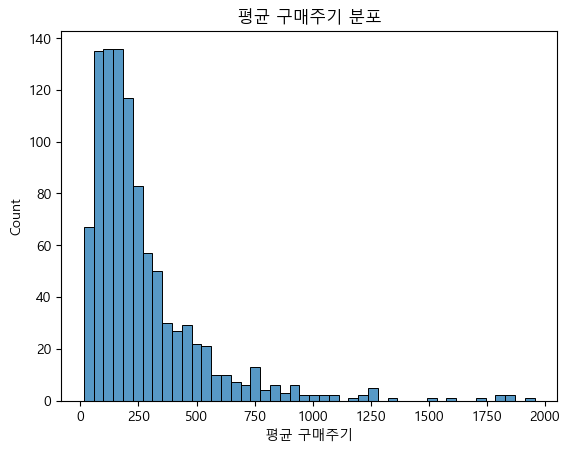

In [1]:
#1. 모듈 및 함수 불러오기
import pandas as pd
from matplotlib import rc, font_manager
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#2. 데이터 불러오기
df = pd.read_csv('Ashopping.csv', encoding = 'cp949')

#3. 폰트 설정
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
plt.rc('font', family=font_name)

#4. 히스토그램 생성
plt.title('평균 구매주기 분포')
sns.histplot(df['평균 구매주기'])
plt.show()

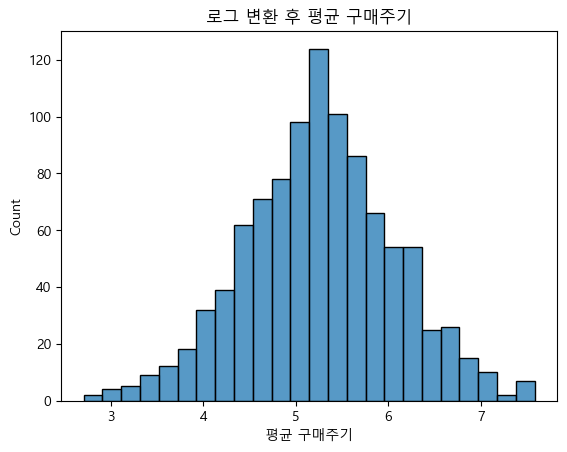

In [2]:
plt.title('로그 변환 후 평균 구매주기')
df['평균 구매주기'] = np.log1p(df['평균 구매주기']) 
sns.histplot(df['평균 구매주기'])
plt.show()

- 변수 지정 및 전처리

In [3]:
#1. 모듈 및 함수 불러오기
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#2. 변수 지정(독립변수/종속변수)
num=['총매출액', '1회 평균매출액', '할인권 사용 횟수','총 할인 금액', '구매카테고리수','Recency', 'Frequency', 'Monetary']
cg=['구매금액대', '고객등급', '구매유형', '클레임접수여부', '거주지역', '성별', '고객 나이대', '할인민감여부']
X = df[df.이탈여부==0][num+cg]
Y = df[df.이탈여부==0]['평균 구매주기']

#3. 데이터 분할(학습용/평가용 데이터 세트)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#4. 표준화 및 원핫인코딩 
ct = ColumnTransformer([('scaling', StandardScaler(), num), ('onehot', OneHotEncoder(sparse=False), cg)])
ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)

print(X_train)

[[-0.42215576 -0.59782402  0.72324173 ...  0.          1.
   0.        ]
 [-0.6083987  -1.00741459 -1.79440286 ...  0.          0.
   1.        ]
 [-0.2500946  -0.40701694 -1.31485151 ...  0.          1.
   0.        ]
 ...
 [-0.29773811 -0.58709878  0.12380254 ...  0.          0.
   1.        ]
 [ 1.92032808  1.86162735  0.96301741 ...  0.          0.
   1.        ]
 [-0.40386402 -0.37164656  0.36357822 ...  0.          1.
   0.        ]]


In [4]:
X_train[0]

array([-0.42215576, -0.59782402,  0.72324173,  0.52150413,  1.67181667,
        1.17304721, -0.24075719,  0.52402175,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ])

- 모형 학습 및 예측

In [5]:
#1. 모듈 및 함수 불러오기
from sklearn.linear_model import LinearRegression

#2 모형 학습
lr= LinearRegression().fit(X_train, Y_train)

#3 모형 예측
Y_pred = lr.predict(X_test)
print('평가용 데이터 세트에 대한 예측값\n', Y_pred)

평가용 데이터 세트에 대한 예측값
 [6.13573495 5.34562889 5.32896881 6.48592896 4.86209948 5.9761075
 4.4649046  3.81497688 5.15049964 5.74438012 5.58790986 3.37917868
 4.33357216 5.3252217  5.7649413  4.95088547 5.3161975  5.72442683
 5.43107536 5.3447842  5.63700811 5.16301685 5.58950163 5.17823711
 4.60315224 5.50286467 5.731194   4.13188342 4.53369455 5.38803383
 5.48792933 5.60519525 5.15121609 5.8116833  5.49704332 5.47353054
 5.14804812 5.68572849 5.36493402 6.5175604  5.32799514 4.26039143
 4.72286775 4.27750187 4.9205606  6.02695379 4.82550289 5.38998865
 5.42736081 5.96661632 5.58093655 6.25700095 4.77964868 4.75538453
 5.37226445 5.24324981 5.10351538 5.60356244 4.14316836 5.00064284
 5.22737597 4.90461804 4.34811855 5.68501403 4.62530251 5.59204553
 5.59638941 4.88200038 5.53061085 3.26233552 5.50156258 4.97082763
 5.16992009 4.91962063 4.03301317 5.75742    5.77881543 5.42481
 4.00026693 4.99203941 4.93368128 5.56685127 5.39570353 4.56896648
 5.60563675 5.09561921 5.13201608 5.42929561 4

- 모형 평가

In [6]:
print('학습용 데이터 세트 결정계수: {:.3f}'.format(lr.score(X_train, Y_train)))
print('평가용 데이터 세트 결정계수: {:.3f}'.format(lr.score(X_test, Y_test)))

학습용 데이터 세트 결정계수: 0.742
평가용 데이터 세트 결정계수: 0.726


In [7]:
#1. 모듈 및 함수 불러오기
from sklearn.metrics import mean_squared_error
from math import sqrt

#2. RMSE 계산
rmse= sqrt(mean_squared_error(Y_test, Y_pred))
print('RMSE: {:.3f}'.format(rmse))

RMSE: 0.384


- 절편 및 가중치 출력

In [8]:
print('절편: ', np.round(lr.intercept_, 3))
print('가중치: ', np.round(lr.coef_, 3))

절편:  5.202
가중치:  [-0.165  0.386 -0.015 -0.009  0.054 -0.008 -0.306  0.013  0.323  0.023
 -0.346  0.013 -0.013  0.036  0.029  0.01  -0.075 -0.071  0.071  0.434
 -0.091 -0.058 -0.177 -0.025 -0.082 -0.    -0.057  0.057 -0.377  0.
  0.052  0.045  0.06   0.22  -0.11   0.11 ]


In [9]:
max(np.round(lr.coef_, 3))

0.434

### [2] 릿지 선형 회귀모형

- 모형 학습 및 예측

In [10]:
#1. 모듈 및 함수 불러오기
from sklearn.linear_model import Ridge

#2. 모형 학습 및 예측
Rr=Ridge(random_state=0).fit(X_train, Y_train)
Y_pred = Rr.predict(X_test)

print('평가용 데이터 세트에 대한 예측값\n', Y_pred)

평가용 데이터 세트에 대한 예측값
 [6.13503174 5.35122868 5.3348788  6.48808354 4.86546971 5.97985706
 4.47093419 3.82226064 5.15240472 5.74497716 5.5890913  3.36695845
 4.33827463 5.32562703 5.7681992  4.9500171  5.31215907 5.71774994
 5.43204398 5.23252744 5.63545283 5.15950252 5.59772127 5.17306471
 4.60781568 5.50059069 5.73311864 4.13965277 4.53229514 5.38740546
 5.48563923 5.59746635 5.14742521 5.81249319 5.50218793 5.47445221
 5.15624358 5.68405625 5.3613745  6.5231375  5.32735496 4.27044768
 4.7258389  4.28608802 4.91887257 6.02842429 4.83198226 5.38907175
 5.42221914 5.96313468 5.57875414 6.25284098 4.77962028 4.75905506
 5.36542399 5.24613873 5.10468003 5.60449406 4.1587125  4.9981494
 5.22082494 4.90776094 4.34980286 5.68680208 4.62471399 5.58577228
 5.59217393 4.88246197 5.53965379 3.2733976  5.50197961 4.97205304
 5.1710552  4.92826425 4.03720676 5.76231538 5.78279785 5.42317097
 4.00829467 5.00283367 4.93457925 5.56371633 5.40395771 4.56753535
 5.6055676  5.09546666 5.12637565 5.4283681

- 모형 평가

In [11]:
print('학습용 데이터 세트 결정계수: {:.3f}'.format(Rr.score(X_train, Y_train)))
print('평가용 데이터 세트 결정계수: {:.3f}'.format(Rr.score(X_test, Y_test)))

학습용 데이터 세트 결정계수: 0.742
평가용 데이터 세트 결정계수: 0.728


In [12]:
rmse= sqrt(mean_squared_error(Y_test, Y_pred))
print('RMSE: {:.3f}'.format(rmse))

RMSE: 0.382


- 절편 및 가중치 출력

In [13]:
print('절편: ', np.round(Rr.intercept_, 3))
print('가중치: ', np.round(Rr.coef_, 3))

절편:  5.186
가중치:  [-0.167  0.386 -0.014 -0.009  0.052 -0.009 -0.304  0.013  0.318  0.021
 -0.339  0.016 -0.016  0.034  0.028  0.013 -0.075 -0.071  0.071  0.334
 -0.069 -0.042 -0.16  -0.011 -0.067  0.014 -0.057  0.057 -0.364  0.001
  0.055  0.048  0.059  0.201 -0.109  0.109]


### [3] 라쏘 선형 회귀모형

- 모형 학습 및 예측

In [14]:
#1. 모듈 및 함수 불러오기
from sklearn.linear_model import Lasso

#2. 모형 학습 및 예측
Lr=Lasso(random_state=0, alpha=0.001, max_iter=10000).fit(X_train, Y_train)
Y_pred = Lr.predict(X_test)

print('평가용 데이터 세트에 대한 예측값\n', Y_pred)

평가용 데이터 세트에 대한 예측값
 [6.11954849 5.35745258 5.34822792 6.48990106 4.86786627 5.96240577
 4.46364808 3.82927033 5.15909009 5.73217567 5.59973977 3.36812278
 4.34705073 5.32536364 5.78268016 4.94554382 5.2944851  5.72355324
 5.44774688 5.19074412 5.63302274 5.15359217 5.61652506 5.1709
 4.62418636 5.50456773 5.73783263 4.15526714 4.53180588 5.39242593
 5.47446012 5.60207345 5.13924485 5.81121649 5.52027948 5.47434721
 5.1494657  5.67961937 5.36398548 6.53273395 5.33720282 4.29270608
 4.73080292 4.29024208 4.92578976 6.02958819 4.84102237 5.38703924
 5.40845303 5.94219814 5.56992403 6.23445295 4.75375835 4.7675725
 5.36589372 5.25293495 5.10651131 5.61046474 4.16520067 4.98927338
 5.20111486 4.90943289 4.3518893  5.67980952 4.62521064 5.57360464
 5.58461405 4.86500077 5.53709299 3.26618331 5.5060303  4.96279041
 5.17240679 4.92715548 4.04461009 5.77174363 5.79723513 5.42278215
 4.00789751 5.00678718 4.93848501 5.54803465 5.44122451 4.55135878
 5.60287004 5.10107289 5.1274264  5.43848619 4.

- 모형 평가

In [15]:
print('학습용 데이터 세트 결정계수: {:.3f}'.format(Lr.score(X_train, Y_train)))
print('평가용 데이터 세트 결정계수: {:.3f}'.format(Lr.score(X_test, Y_test)))

학습용 데이터 세트 결정계수: 0.741
평가용 데이터 세트 결정계수: 0.730


In [16]:
rmse= sqrt(mean_squared_error(Y_test, Y_pred))
print('RMSE: {:.3f}'.format(rmse))

RMSE: 0.381


- 절편 및 가중치 출력

In [17]:
print('사용한 변수의 개수: ', len(Lr.coef_!=0))
print('절편: ', np.round(Lr.intercept_, 3))
print('가중치: ', np.round(Lr.coef_, 3))

사용한 변수의 개수:  36
절편:  5.448
가중치:  [-0.167  0.386 -0.013 -0.009  0.047 -0.004 -0.301  0.011  0.298 -0.
 -0.358  0.03  -0.     0.005  0.007 -0.    -0.087 -0.137  0.     0.317
 -0.    -0.    -0.113  0.024 -0.022  0.043 -0.108  0.    -0.417 -0.047
  0.    -0.     0.     0.113 -0.216  0.   ]
